In [1]:
!pip install WordCloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.io as pio

# reading the data set


In [3]:
shop = pd.read_csv('shopping_trends_updated.csv')
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
shop.shape


(3900, 18)

In [5]:
shop.dtypes


Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [6]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# It will show the names of the columns 


In [7]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
shop_dup = shop[shop.duplicated()]
shop_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [10]:
shop["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [12]:
shop.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [13]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']


In [14]:
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()# This will print a blank line

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']



In [15]:
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


# Now we will see the Questions

1. What is the overall distribution of customer ages in the dataset? 

In [16]:
shop['Age'].value_counts()


Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [17]:
shop['Age'].mean()


np.float64(44.06846153846154)

In [18]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )


In [20]:
fig = px.histogram(shop , y = 'Age' , x = 'Age_category')
fig.show()


# 2 How does the average purchase amount vary across different product categories?


In [21]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [22]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [23]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

# 3 Which gender has the highest number of purchases?

In [24]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

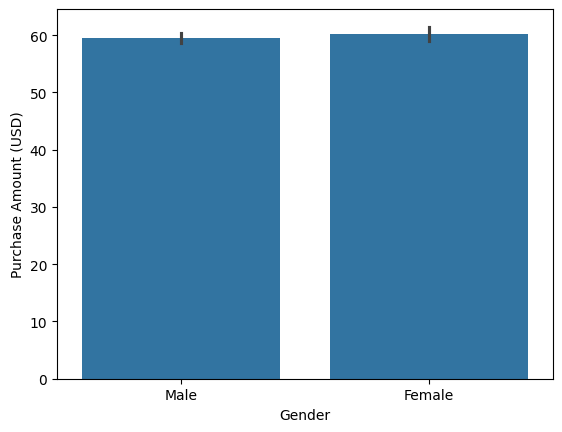

In [25]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

# 4 What are the most commonly purchased items in each category?

In [26]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [27]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [28]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category')
fig.show()

# 5 Are there any specific seasons or months where customer spending is significantly higher?

In [29]:
print(f"Unique Seasons: {shop['Season'].unique()}")
count = shop[shop['Season'] == 'Summer'].shape[0]
print(f"Total number of Summer season records: {count}")
count1 = shop[shop['Season'] == 'Winter'].shape[0]
print(f"Total number of Winter season records: {count1}")
count3 = shop[shop['Season'] == 'Spring'].shape[0]
print(f"Total number of Spring season records: {count3}")
count4 = shop[shop['Season'] == 'Fall'].shape[0]
print(f"Total number of Fall season records: {count4}")

Unique Seasons: ['Winter' 'Spring' 'Summer' 'Fall']
Total number of Summer season records: 955
Total number of Winter season records: 971
Total number of Spring season records: 999
Total number of Fall season records: 975


In [30]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )

fig.show()

# 6 What is the average rating given by customers for each product category?

In [31]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [32]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

# 7 Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [33]:
print(f"Columns in the shop DataFrame: {list(shop.columns)}")

Columns in the shop DataFrame: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases', 'Age_category']


In [34]:
print(f"Unique Subscription Status values: {shop['Subscription Status'].unique()}")

Unique Subscription Status values: ['Yes' 'No']


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

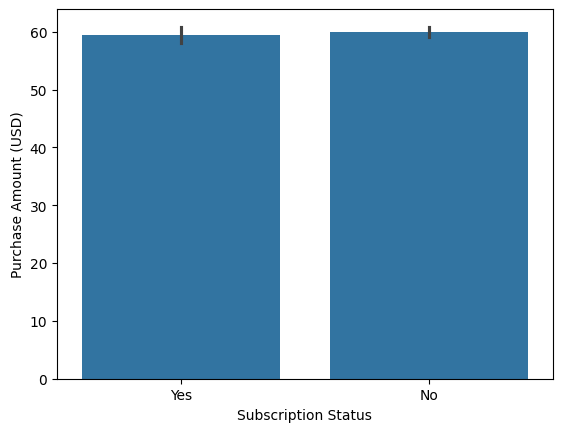

In [35]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [36]:
total_purchase = shop['Purchase Amount (USD)'].sum()
print(f"Total Purchase Amount (USD): ${total_purchase:.2f}")

Total Purchase Amount (USD): $233081.00


In [37]:
avg_purchase = shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount (USD) per Subscription Status:")
print(avg_purchase)

Average Purchase Amount (USD) per Subscription Status:
Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


# 8 Which payment method is the most popular among customers?

In [38]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [39]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [40]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

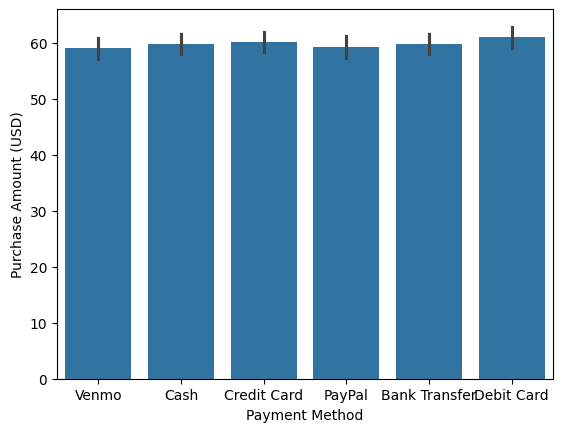

In [41]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

# 9 Do customers who use promo codes tend to spend more than those who don't?

In [42]:
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()


In [43]:
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

In [44]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

# 10 How does the frequency of purchases vary across different age groups?

In [45]:
print("Age and Age Category columns:")
print(shop[['Age', 'Age_category']])

Age and Age Category columns:
      Age        Age_category
0      55                 old
1      19        Young Adults
2      50  Middle-Aged Adults
3      21        Young Adults
4      45  Middle-Aged Adults
...   ...                 ...
3895   40  Middle-Aged Adults
3896   52                 old
3897   46  Middle-Aged Adults
3898   44  Middle-Aged Adults
3899   52                 old

[3900 rows x 2 columns]


In [46]:
print(f"Unique Age Categories: {shop['Age_category'].unique()}")


Unique Age Categories: ['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']


In [47]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [48]:
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age')

# 11 Are there any correlations between the size of the product and the purchase amount?

In [49]:
print(f"Columns in the shop DataFrame: {list(shop.columns)}")

Columns in the shop DataFrame: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases', 'Age_category']


In [50]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [51]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

# 12 Which shipping type is preferred by customers for different product categories?

In [52]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [53]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [54]:
print(f"Unique Categories: {shop['Category'].unique()}")


Unique Categories: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [55]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

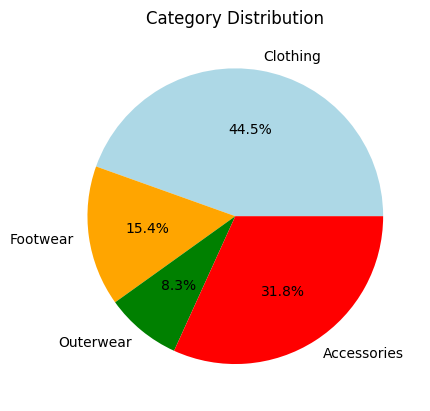

In [56]:
category_counts = shop['Category_num'].value_counts().sort_index()
labels = ['Clothing', 'Footwear', 'Outerwear', 'Accessories']

plt.pie(category_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange', 'green', 'red'])
plt.title("Category Distribution")
plt.show()

# 13 How does the presence of a discount affect the purchase decision of customers?

In [57]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category',
       'Shipping_Category', 'Category_num'],
      dtype='object')

In [58]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [59]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [60]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

# 14 Are there any specific colors that are more popular among customers?

In [61]:
px.histogram(shop , x = 'Color')

In [62]:
shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

# 15 What is the average number of previous purchases made by customers?

In [63]:
print(f"Average Previous Purchases: {shop['Previous Purchases'].mean():.2f}")

Average Previous Purchases: 25.35


# 16 Are there any noticeable differences in purchase behavior between different locations?

In [64]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [65]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [66]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

# 17 Is there a relationship between customer age and the category of products they purchase?

In [67]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [68]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

# 18 How does the average purchase amount differ between male and female customers?

In [69]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

In [70]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

In [71]:
px.sunburst(data_frame= shop , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')

# 19 How does the average purchase amount differ between male and female customers? 

In [72]:
avg_purchase_by_gender = shop.groupby('Gender')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount (USD) by Gender:")
print(avg_purchase_by_gender)


Average Purchase Amount (USD) by Gender:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


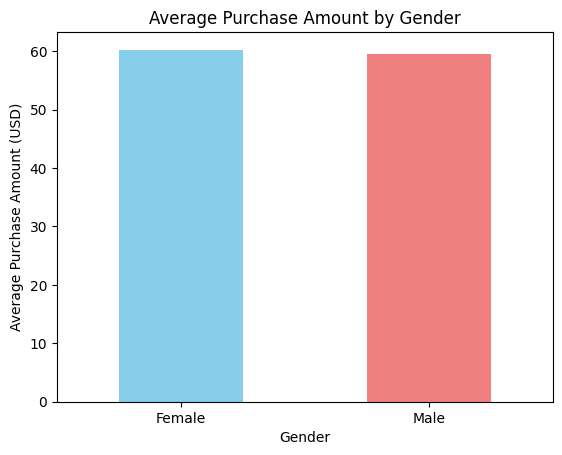

In [73]:
avg_purchase_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Gender')

plt.xticks(rotation=0)
plt.show()